# R for Data Science (2e)

# Day 3. Data Transformation

## Introduction

This [chapter](https://r4ds.hadley.nz/data-transform) will introduce you to data transformation using the dplyr package and a new dataset on flights that departed from New York City in 2013.

### Prerequisites

In [75]:
# install.packages("nycflights13")

In [76]:
library(nycflights13)
library(tidyverse)

### nycflights13

This dataset contains all *336,776 flights that departed from New York City in 2013*. The data comes from the US Bureau of Transportation Statistics, and is documented in `?flights`. For short:

     Data frame with columns year, month, day Date of departure.

     dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.

     sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM), local tz.

In [77]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [78]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2~
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, ~
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, ~
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1~
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,~
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,~
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1~
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "~
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4~
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394~
$ origin      

### `dplyr` basics

1. The first argument is always a data frame.
2. The subsequent arguments typically describe which columns to operate on, using the variable names (without quotes).
3. The output is always a new data frame.

`|>`: the pipe to combining multiple verbs (functions): the pipe takes the thing on its left and passes it along to the function on its right so that `x |> f(y)` is equivalent to `f(x, y)`, and `x |> f(y) |> g(z)` is equivalent to `g(f(x, y), z)`. The easiest way to pronounce the pipe is *“then”*. 

`dplyr`’s verbs are organized into four groups based on what they operate on: **rows**, **columns**, **groups**, or **tables**. In the following sections you’ll learn the most important verbs for rows, columns, and groups, then we’ll come back to the join verbs that work on tables in Chapter 19.

In [79]:
# |>: the pipe to combining multiple verbs (functions)
flights |>
  filter(dest == "IAH") |> 
  group_by(year, month, day) |> 
  summarize(
    arr_delay = mean(arr_delay, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,17.850000
2013,1,2,7.000000
2013,1,3,18.315789
2013,1,4,-3.200000
2013,1,5,20.230769
2013,1,6,9.277778
2013,1,7,-7.736842
2013,1,8,7.789474
2013,1,9,18.055556


## Rows

Some important verbs that operate on rows:
* `filter()`: allows you to keep rows based on the values of the columns without changing their order
* `arrange()`: changes the order of the rows based on the value of the columns (without changing which are present)

Both functions only affect the rows, and the columns are left unchanged.
* `distinct()` which finds rows with unique values but unlike `arrange()` and `filter()` it can also optionally modify the columns.

### `filter()`

In [80]:
flights |> filter(dep_delay > 1000)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00


In [81]:
# Flights that departed on January 1
flights |> filter(month==1 & day==1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [82]:
# A shorter way to select flights that departed in January or February
flights |> 
  filter(month %in% c(1, 2))
  # the same as filter(month==1 | month==2)
  # but not filter(month == 1 | 2) - error!

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### `arrange()`

In [83]:
flights |> arrange(year, month, day, dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [84]:
flights |> arrange(desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


### `distinct()`

In [85]:
# Remove duplicate rows, if any
flights |> 
  distinct()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [86]:
# # Find all unique origin and destination pairs
flights |> 
  distinct(origin, dest)

origin,dest
<chr>,<chr>
EWR,IAH
LGA,IAH
JFK,MIA
JFK,BQN
LGA,ATL
EWR,ORD
EWR,FLL
LGA,IAD
JFK,MCO


In [87]:
# keep other columns when filtering for unique rows
flights |> 
  distinct(origin, dest, .keep_all = TRUE)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


If you want to find the number of occurrences instead, you’re better off swapping `distinct()` for `count()`, and with the `sort = TRUE` argument you can arrange them in descending order of number of occurrences. 

In [88]:
flights |>
  count(origin, dest, sort = TRUE)

origin,dest,n
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


### Exercises

3.2.1. Single pipeline:
* Had an arrival delay of two or more hours
* Flew to Houston (IAH or HOU)
* Were operated by United, American, or Delta
* Departed in summer (July, August, and September)
* Arrived more than two hours late, but didn’t leave late
* Were delayed by at least an hour, but made up over 30 minutes in flight

3.2.2. Sort flights to find the flights with longest departure delays. Find the flights that left earliest in the morning.

3.2.3. Sort flights to find the fastest flights. (Hint: Try including a math calculation inside of your function.)

3.2.4. Was there a flight on every day of 2013?

3.2.5. Which flights traveled the farthest distance? Which traveled the least distance?

3.2.6. Does it matter what order you used filter() and arrange() if you’re using both? Why/why not? Think about the results and how much work the functions would have to do.

In [89]:
#3.2.1. Had an arrival delay of two or more hours


In [90]:
#3.2.1. Flew to Houston (IAH or HOU)


In [91]:
#3.2.1. Were operated by United, American, or Delta
#

In [92]:
#3.2.1. Departed in summer (July, August, and September)


In [93]:
#3.2.1. Arrived more than two hours late, but didn’t leave late


In [94]:
#3.2.1. Were delayed by at least an hour, but made up over 30 minutes in flight



In [95]:
#3.2.2. Sort flights to find the flights with longest departure delays. Find the flights that left earliest in the morning.



In [96]:
#3.2.3. Sort flights to find the fastest flights. (Hint: Try including a math calculation inside of your function.)



In [97]:
#3.2.4. Was there a flight on every day of 2013?

#

In [98]:
#3.2.5. Which flights traveled the farthest distance? Which traveled the least distance?



In [99]:
#3.2.6. Does it matter what order you used filter() and arrange() if you’re using both? Why/why not? 
# Think about the results and how much work the functions would have to do.

## Columns

There are four important verbs that affect the columns without changing the rows:
* `mutate()` creates new columns that are derived from the existing columns
* `select()` changes which columns are present
* `rename()` changes the names of the columns
* `relocate()` changes the positions of the columns.

### `mutate()`
By default, `mutate()` adds new columns on the right hand side of your dataset, which makes it difficult to see what’s happening here. We can use the `.before` argument to instead add the variables to the left hand side.

In [100]:
flights |> 
  mutate(
    gain = dep_delay - arr_delay,       # gain, how much time a delayed flight made up in the air
    speed = distance / air_time * 60,   # the speed in miles per hour
    .after = day                         # try: .before = 1
  )

year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,...,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,...,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,-9,370.0441,517,515,2,830,819,...,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,-16,374.2731,533,529,4,850,830,...,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,-31,408.3750,542,540,2,923,850,...,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,17,516.7213,544,545,-1,1004,1022,...,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,19,394.1379,554,600,-6,812,837,...,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,-16,287.6000,554,558,-4,740,728,...,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,-24,404.4304,555,600,-5,913,854,...,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,11,259.2453,557,600,-3,709,723,...,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,5,404.5714,557,600,-3,838,846,...,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [101]:
flights |> 
  mutate(
    gain = dep_delay - arr_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours,
    .keep = "used"
  )

dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11,227,-9,3.7833333,-2.3788546
4,20,227,-16,3.7833333,-4.2290749
2,33,160,-31,2.6666667,-11.6250000
-1,-18,183,17,3.0500000,5.5737705
-6,-25,116,19,1.9333333,9.8275862
-4,12,150,-16,2.5000000,-6.4000000
-5,19,158,-24,2.6333333,-9.1139241
-3,-14,53,11,0.8833333,12.4528302
-3,-8,140,5,2.3333333,2.1428571


### `select()`

There are a number of helper functions you can use within `select()`:

* `starts_with("abc")`: matches names that begin with “abc”.
* `ends_with("xyz")`: matches names that end with “xyz”.
* `contains("ijk")`: matches names that contain “ijk”.
* `num_range("x", 1:3)`: matches x1, x2 and x3.

See `?select` for more details


In [102]:
flights |> 
  select(year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [103]:
flights |> 
  select(year:day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [104]:
flights |> 
  select(!year:day)

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [105]:
#Select all columns that are characters:

flights |> 
  select(!where(is.character))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,1545,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,1714,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,1141,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,725,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,461,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,1696,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,507,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,5708,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,79,140,944,6,0,2013-01-01 06:00:00


In [106]:
# rename variable while select
flights |> 
  select(tail_num = tailnum)

tail_num
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463
N516JB
N829AS
N593JB



### `rename()`

If you want to keep all the existing variables and just want to rename a few, you can use `rename()` instead of `select()`:

also try: janitor::clean_names()

In [107]:
flights |> 
  rename(tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### `relocate()`
By default `relocate()` moves variables to the front:

In [108]:
flights |> 
  relocate(time_hour, air_time)

# flights |> 
#   relocate(year:dep_time, .after = time_hour)
# flights |> 
#   relocate(starts_with("arr"), .before = dep_time)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0


### 3.3. Exercises 

3.3.1 Compare dep_time, sched_dep_time, and dep_delay. How would you expect those three numbers to be related?


3.3.2. Brainstorm as many ways as possible to select dep_time, dep_delay, arr_time, and arr_delay from flights.


3.3.3. What happens if you specify the name of the same variable multiple times in a select() call?

3.3.4. What does the any_of() function do? Why might it be helpful in conjunction with this vector?

In [109]:
variables <- c("year", "month", "day", "dep_delay", "arr_delay")

3.3.5. Does the result of running the following code surprise you? How do the select helpers deal with upper and lower case by default? How can you change that default?

In [110]:
flights |> select(contains("TIME"))

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
<int>,<int>,<int>,<int>,<dbl>,<dttm>
517,515,830,819,227,2013-01-01 05:00:00
533,529,850,830,227,2013-01-01 05:00:00
542,540,923,850,160,2013-01-01 05:00:00
544,545,1004,1022,183,2013-01-01 05:00:00
554,600,812,837,116,2013-01-01 06:00:00
554,558,740,728,150,2013-01-01 05:00:00
555,600,913,854,158,2013-01-01 06:00:00
557,600,709,723,53,2013-01-01 06:00:00
557,600,838,846,140,2013-01-01 06:00:00


3.3.6. Rename air_time to air_time_min to indicate units of measurement and move it to the beginning of the data frame.

3.3.7. Why doesn’t the following work, and what does the error mean?

In [111]:
# flights |> 
#   select(tailnum) |> 
#   arrange(arr_delay)

## The pipe

In [112]:
flights |> 
  filter(dest == "IAH") |> 
  mutate(speed = distance / air_time * 60) |> 
  select(year:day, dep_time, carrier, flight, speed) |> 
  arrange(desc(speed))

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


What would happen if we didn’t have the pipe? We could nest each function call inside the previous call:

In [113]:
arrange(
  select(
    mutate(
      filter(
        flights, 
        dest == "IAH"
      ),
      speed = distance / air_time * 60
    ),
    year:day, dep_time, carrier, flight, speed
  ),
  desc(speed)
)

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


Or we could use a bunch of intermediate objects:

In [114]:
flights1 <- filter(flights, dest == "IAH")
flights2 <- mutate(flights1, speed = distance / air_time * 60)
flights3 <- select(flights2, year:day, dep_time, carrier, flight, speed)
arrange(flights3, desc(speed))

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


## Groups

### `group_by()`  
divide your dataset into groups meaningful for your analysis:

In [115]:
flights |> 
  group_by(month)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### `summarize()`
The most important grouped operation is a summary, which, if being used to calculate a single summary statistic, reduces the data frame to have a single row for each group.

In [116]:
flights |> 
  group_by(month) |> 
  summarize(
    avg_delay = mean(dep_delay)
  )

month,avg_delay
<int>,<dbl>
1,NA
2,NA
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA


In [117]:
flights |> 
  group_by(month) |> 
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE)
  )

month,avg_delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


In [118]:
flights |> 
  group_by(month) |> 
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE), 
    n = n()
  )

month,avg_delay,n
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574


### The `slice_` functions
* `df |> slice_head(n = 1)` takes the first row from each group.
* `df |> slice_tail(n = 1)` takes the last row in each group.
* `df |> slice_min(x, n = 1)` takes the row with the smallest value of column x.
* `df |> slice_max(x, n = 1)` takes the row with the largest value of column x.
* `df |> slice_sample(n = 1)` takes one random row.

You can vary n to select more than one row, or instead of n =, you can use prop = 0.1 to select (e.g.) 10% of the rows in each group

In [119]:
flights |> 
  group_by(dest) |> 
  slice_max(arr_delay, with_ties = FALSE, n = 1) |>
  relocate(dest)

dest,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
ABQ,2013,7,22,2145,2007,98,132,2259,153,B6,1505,N784JB,JFK,259,1826,20,7,2013-07-22 20:00:00
ACK,2013,7,23,1139,800,219,1250,909,221,B6,1491,N192JB,JFK,44,199,8,0,2013-07-23 08:00:00
ALB,2013,1,25,123,2000,323,229,2101,328,EV,4309,N13908,EWR,30,143,20,0,2013-01-25 20:00:00
ANC,2013,8,17,1740,1625,75,2042,2003,39,UA,887,N528UA,EWR,404,3370,16,25,2013-08-17 16:00:00
ATL,2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,109,762,7,59,2013-07-22 07:00:00
AUS,2013,7,10,2056,1505,351,2347,1758,349,UA,503,N803UA,EWR,192,1504,15,5,2013-07-10 15:00:00
AVL,2013,8,13,1156,832,204,1417,1029,228,EV,4175,N13538,EWR,108,583,8,32,2013-08-13 08:00:00
BDL,2013,2,21,1728,1316,252,1839,1413,266,EV,4103,N16976,EWR,26,116,13,16,2013-02-21 13:00:00
BGR,2013,12,1,1504,1056,248,1628,1230,238,EV,5309,N615QX,LGA,57,378,10,56,2013-12-01 10:00:00


### Grouping by multiple variables

In [120]:
daily <- flights |>  
  group_by(year, month, day)
daily

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [121]:
# daily_flights <- daily |> 
#   summarize(n = n())
#> `summarise()` has grouped output by 'year', 'month'. You can override using
#> the `.groups` argument.
daily_flights <- daily |> 
  summarize(
    n = n(), 
    .groups = "drop_last"
  )

### Ungrouping
You might also want to remove grouping from a data frame without using `summarize()`. You can do this with `ungroup()`

In [122]:
daily |> 
  ungroup()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [123]:
daily |> 
  ungroup() |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE), 
    flights = n()
  )

avg_delay,flights
<dbl>,<int>
12.63907,336776


### `.by`
Instead of using `group_by()` and `ungroup()`

In [124]:
flights |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    n = n(),
    .by = c(origin, dest)
  )

origin,dest,delay,n
<chr>,<chr>,<dbl>,<int>
EWR,IAH,11.826551,3973
LGA,IAH,9.058986,2951
JFK,MIA,9.336571,3314
JFK,BQN,6.665546,599
LGA,ATL,11.448621,10263
EWR,ORD,14.644163,6100
EWR,FLL,13.532606,3793
LGA,IAD,16.650421,1803
JFK,MCO,10.601583,5464


In [125]:
# group by multiple variables
flights |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    n = n(),
    .by = c(origin, dest)
  )

origin,dest,delay,n
<chr>,<chr>,<dbl>,<int>
EWR,IAH,11.826551,3973
LGA,IAH,9.058986,2951
JFK,MIA,9.336571,3314
JFK,BQN,6.665546,599
LGA,ATL,11.448621,10263
EWR,ORD,14.644163,6100
EWR,FLL,13.532606,3793
LGA,IAD,16.650421,1803
JFK,MCO,10.601583,5464


# Exercises
3.5.1. Which carrier has the worst average delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not? (Hint: think about `flights |> group_by(carrier, dest) |> summarize(n())`)


3.5.2. Find the flights that are most delayed upon departure from each destination.

3.5.3. How do delays vary over the course of the day. Illustrate your answer with a plot.

3.5.4. What happens if you supply a negative n to slice_min() and friends?

3.5.5. Explain what count() does in terms of the dplyr verbs you just learned. What does the sort argument to count() do?

3.5.6. Suppose we have the following tiny data frame:

In [126]:
df <- tibble(
  x = 1:5,
  y = c("a", "b", "a", "a", "b"),
  z = c("K", "K", "L", "L", "K")
)

a. Write down what you think the output will look like, then check if you were correct, and describe what group_by() does.

In [127]:
df |>
  group_by(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
2,b,K
3,a,L
4,a,L
5,b,K


b. Write down what you think the output will look like, then check if you were correct, and describe what arrange() does. Also comment on how it’s different from the group_by() in part (a)?

In [128]:
df |>
  arrange(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
3,a,L
4,a,L
2,b,K
5,b,K


c. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does.

In [129]:
df |>
  group_by(y) |>
  summarize(mean_x = mean(x))

y,mean_x
<chr>,<dbl>
a,2.666667
b,3.500000


d. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does. Then, comment on what the message says.


In [130]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x))

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


e. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does. How is the output different from the one in part (d).

In [131]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x), .groups = "drop")

y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


f. Write down what you think the outputs will look like, then check if you were correct, and describe what each pipeline does. How are the outputs of the two pipelines different?

In [132]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x))
df |>
  group_by(y, z) |>
  mutate(mean_x = mean(x))

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


x,y,z,mean_x
<int>,<chr>,<chr>,<dbl>
1,a,K,1.0
2,b,K,3.5
3,a,L,3.5
4,a,L,3.5
5,b,K,3.5


## Case study: aggregates and sample size
Whenever you do any aggregation, it’s always a good idea to include a count (`n()`). That way, you can ensure that you’re not drawing conclusions based on very small amounts of data. We’ll demonstrate this with some baseball data from the **Lahman** package. Specifically, we will compare what proportion of times a player gets a hit (`H`) vs. the number of times they try to put the ball in play (`AB`):



In [133]:
batters <- Lahman::Batting |> 
  group_by(playerID) |> 
  summarize(
    performance = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    n = sum(AB, na.rm = TRUE)
  )
batters

playerID,performance,n
<chr>,<dbl>,<int>
aardsda01,0.00000000,4
aaronha01,0.30499838,12364
aaronto01,0.22881356,944
aasedo01,0.00000000,5
abadan01,0.09523810,21
abadfe01,0.11111111,9
abadijo01,0.22448980,49
abbated01,0.25361367,3044
abbeybe01,0.16888889,225


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


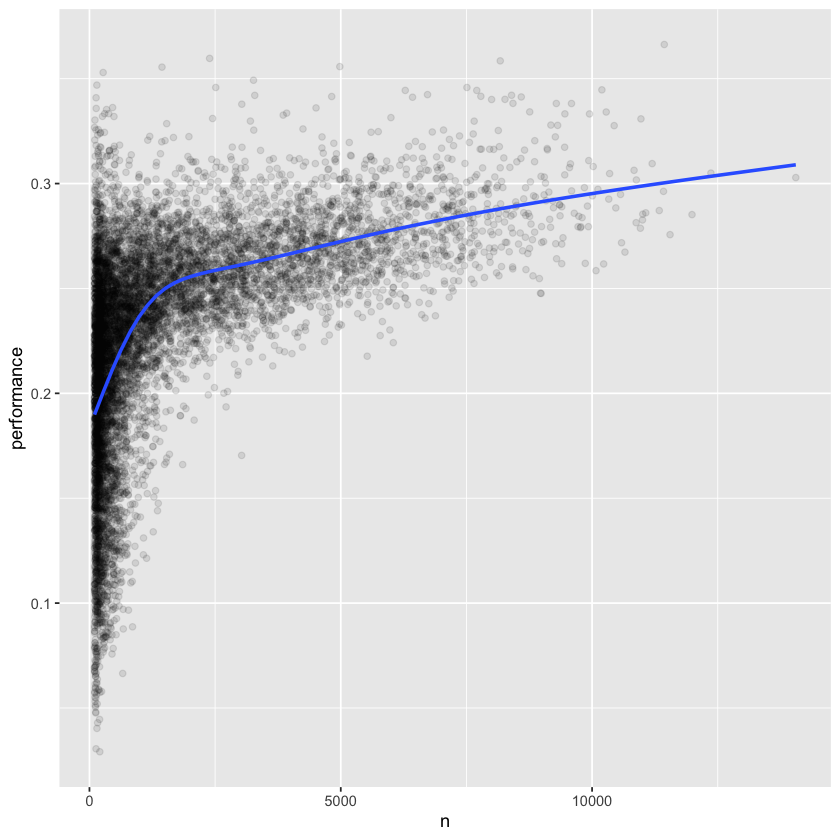

In [134]:
batters |> 
  filter(n > 100) |> 
  ggplot(aes(x = n, y = performance)) +
  geom_point(alpha = 1 / 10) + 
  geom_smooth(se = FALSE)

In [135]:
batters |> 
  arrange(desc(performance))

playerID,performance,n
<chr>,<dbl>,<int>
abramge01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1
cammaer01,1,1


## Summary

In this chapter, you’ve learned the tools that dplyr provides for working with data frames. The tools are roughly grouped into three categories: those that manipulate the rows (like `filter()` and `arrange()`), those that manipulate the columns (like `select()` and `mutate()`), and those that manipulate groups (like group_by() and summarize()). In this chapter, we’ve focused on these “*whole data frame*” tools, but you haven’t yet learned much about what you can do with the *individual variable*. 